## Preparing Environement

In [1]:
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys
# add the 'src' directory as one where we can import modules
root_dir = os.path.join(os.getcwd(),os.pardir,os.pardir)
src_dir = os.path.join(root_dir, 'src')
if src_dir not in sys.path: sys.path.append(src_dir)
    
import math
import copy as cp
from datetime import datetime

import numpy as np
import pandas as pd

import matplotlib.style
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,Birch,AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn import preprocessing

from scipy.cluster import hierarchy
from scipy import stats
from scipy.stats import mstats

import helpers as hlp
%aimport helpers
from external import kMedoids
from IPython.display import display

#printing
pd.options.display.float_format = '{:,.2f}'.format


C:\Users\rahmim00\AppData\Local\Continuum\anaconda3\envs\dev_py34\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Load preprocessed data

In [24]:
raw_path = os.path.join(root_dir,"data\\raw\\")
interim_path = os.path.join(root_dir,"data\\interim\\") 
processed_path = os.path.join(root_dir,"data\\processed\\") 

reports_path = os.path.join(root_dir,"reports\\")
models_path = os.path.join(root_dir,"models\\")

raw_file_name ="bnd_product_p2_raw_mois.csv"
clean_file_name = "bnd_product_p2_clean_mois.csv"
z_file_name ="bnd_product_z_p2_clean_mois.csv"

row_headers = ['Product']
n_row_headers = len(row_headers)



product_raw_df = pd.read_csv(interim_path+raw_file_name, sep=';', encoding='utf-8')
product_df = pd.read_csv(interim_path+clean_file_name, sep=';', encoding='utf-8')
product_df_full = pd.read_csv(processed_path+z_file_name, sep=';', encoding='utf-8')

X_z = product_df_full.values[:,n_row_headers:]



nb_col = X_z.shape[1]
X_pca = PCA(n_components = nb_col).fit_transform(X_z)


product_df_full.head()

Product  2016-01-31 00:00:00  2016-02-29 00:00:00  \
0  GBA001BND060FS                -0.94                -0.94   
1  GBA001BND060SS                 0.16                 0.35   
2  GBA001BND160FS                -1.43                 0.93   
3  GBA001BND250FS                -0.45                 0.21   
4  GBA001BNR250FS                -0.82                -0.55   

   2016-03-31 00:00:00  2016-04-30 00:00:00  2016-05-31 00:00:00  \
0                -0.94                -0.94                -0.94   
1                 1.68                 1.25                 1.68   
2                -0.12                -0.96                -1.22   
3                 0.21                 1.53                 1.53   
4                -0.13                 0.24                 0.15   

   2016-06-30 00:00:00  2016-07-31 00:00:00  2016-08-31 00:00:00  \
0                -0.94                -0.94                -0.94   
1                 1.32                 1.68                 1.32   
2                -1.43                 0.14                -0.18   
3                 1.53                 0.65                -0.45   
4                -0.94                -0.30                -0.34   

   2016-09-30 00:00:00         ...           2017-02-28 00:00:00  \
0                -0.94         ...                          1.05   
1                 0.11         ...                         -0.76   
2                -0.25         ...                          1.56   
3                -1.55         ...                         -1.55   
4                -0.76         ...                         -0.59   

   2017-03-31 00:00:00  2017-04-30 00:00:00  2017-05-31 00:00:00  \
0                 1.30                 1.16                 1.30   
1                -0.27                -0.51                -0.59   
2                 1.56                 1.14                -1.19   
3                -1.55                -0.45                 0.43   
4                -0.10                -0.03                 0.47   

   2017-06-30 00:00:00  2017-07-31 00:00:00  2017-08-31 00:00:00  \
0                 1.30                 1.27                 1.14   
1                -0.10                -0.76                -0.78   
2                -1.05                -1.43                 1.56   
3                 0.21                -0.01                 0.21   
4                -0.33                 0.36                 0.05   

   2017-09-30 00:00:00  2017-10-31 00:00:00  2017-11-30 00:00:00  
0                 0.89                 0.82                 0.03  
1                -1.33                -1.33                -1.33  
2                -0.60                 0.19                 0.48  
3                -0.45                 0.87                 1.31  
4                 2.34                 2.34                 2.34  

[5 rows x 24 columns]

# 3. Modeling - Clustering Algorithms
Try out Hierarchical clustering, kMeans and kMedodis  on raw (cleaned) data. Then, plot the PCA to visualize the result of the clustering on the principal components

## Agglomerative - Automated Cut-Off Selection

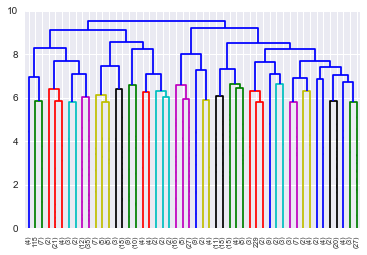

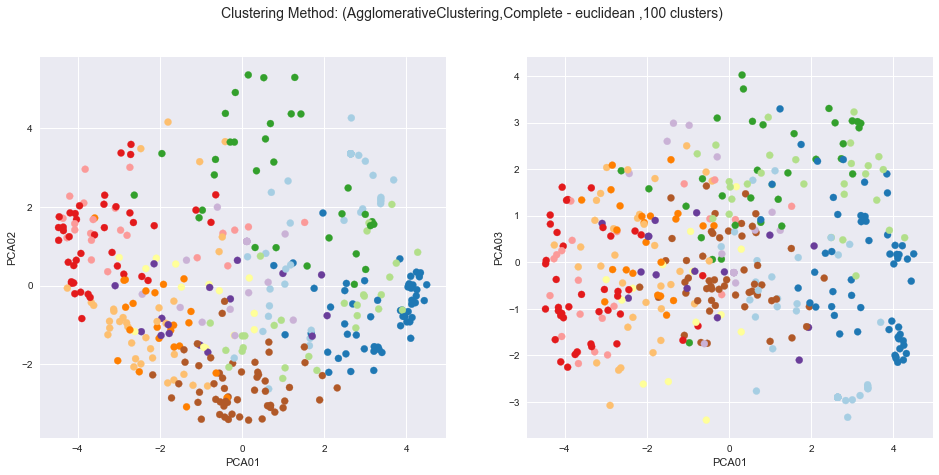

In [25]:
from scipy.cluster import hierarchy

SSE = {}
SILOUHAITE = {}

Z = hierarchy.linkage(X_z, method='complete',metric='euclidean')
dn = hierarchy.dendrogram(Z, truncate_mode='lastp', p=50, leaf_rotation=90., leaf_font_size=7., show_contracted=True)
plt.show()



plt.figure()
labels_h_cc = hierarchy.fcluster(Z, t=100 ,criterion = 'maxclust')
hlp.Clusters_plot(X= X_pca, labels = labels_h_cc,info=["AgglomerativeClustering","Complete - euclidean ","%d clusters"%len(set(labels_h_cc))])


SSE["Agg_complete"] = hlp.getSSE(X_z,X_z[labels_h_cc])

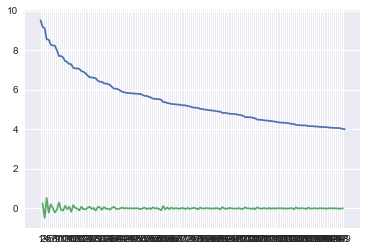

clusters: [  4   3  10   2   5   8   6  16  17  13  12  28  61  20  60  25  15  21
  37  31   9  29  11  32  90  35  30  56 101 107  89  78 125 126  62  63
  50  23 106  14  22  52  53 100  41  65  39  55  79  64  72 131 132  26
 104   7  38  76  74  18  73  92  27  36  24  59  69 114  34 113  70 141
  43 124 112  93 116 109  19 147  33 138  54  58  82  66  99  94 135 134
  81  45 142 117  97 148 115  87  98 149 119 120 108  48 127  86 137 111
  51 103 105  85  95 122  44 128  75  96  68 118  49  46 110  71  57  67
  40  91  77 121 136 145 129 140 133  80  83 139 143 102  84 130 144  47
  42 123 146  88]


In [26]:
last = Z[-150:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.xticks(np.arange(1,len(last)))
plt.show()
best_ks = np.abs(acceleration_rev).argsort()[::-1]
k =  best_ks+ 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k)

### K-Means: Validate different numbers of clusters

clusters: [18 14 16 12 13 17 15 20]
clusters: [11 10 13 15 12 20 14 16 18 17]


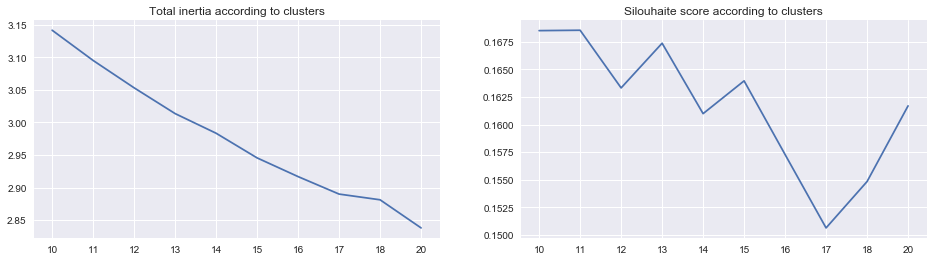

In [27]:
%matplotlib inline
clusters= np.linspace(10,20,10).astype(int)
inertia = []
silouhaite = []
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster).fit(X_z)
    silouhaite.append(hlp.getSilouhaite(X_z,kmeans.labels_))
    inertia += [np.sqrt(kmeans.inertia_/len(kmeans.labels_))]

plt.figure(figsize=(16,4))
    
plt.subplot(1,2,1)
inertia = np.array(inertia)
plt.title("Total inertia according to clusters")    
plt.plot(np.arange(0,len(clusters)),inertia)#scale it to acc2
plt.xticks(np.arange(0,len(clusters)),clusters)


acc = np.diff(inertia, 2)  # 2nd derivative of the inertia curve
#plt.plot(np.arange(2,len(clusters)), acc)
best_ks = acc.argsort()[::-1]
k =  best_ks+ 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:",clusters[k])



plt.subplot(1,2,2)
silouhaite = np.array(silouhaite)
plt.title("Silouhaite score according to clusters")    
plt.plot(np.arange(0,len(clusters)),silouhaite)#scale it to acc2
plt.xticks(np.arange(0,len(clusters)),clusters)
best_ks = silouhaite.argsort()[::-1]
print("clusters:",clusters[best_ks])


plt.show()


## Ward Clustering

16545.451300556128


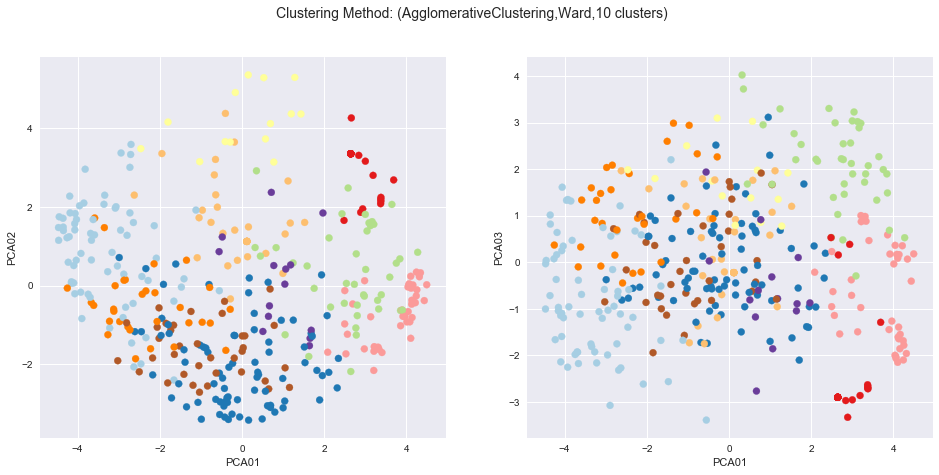

In [28]:
n_cluster = 10

from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=n_cluster, linkage='ward').fit(X_z)
label = ward.labels_

SSE['Ward'] = hlp.getSSE(X_z,X_z[label])
print(SSE['Ward'])
hlp.Clusters_plot(X= X_pca, labels = label,info=["AgglomerativeClustering","Ward","%d clusters"%len(set(label))])

## K-means

In [29]:
%matplotlib inline

kmeans = KMeans(n_clusters=n_cluster).fit(X_z)
label = kmeans.labels_
labels_kmeans = label

SSE["kMeans"] = hlp.getSSE(X_z,X_z[labels_kmeans])

### PCA representation of the clustering

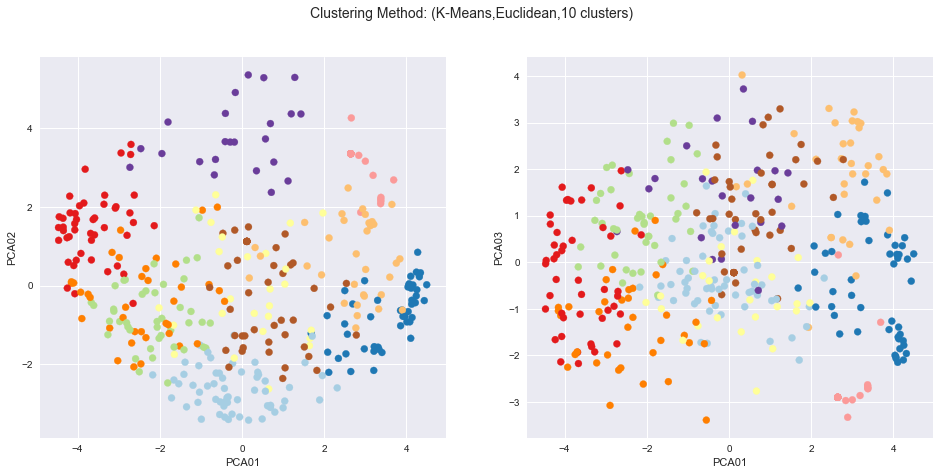

In [30]:
X = X_pca[:,:3]
hlp.Clusters_plot(X= X_pca, labels = label,info=["K-Means","Euclidean","%d clusters"%len(set(label))])

## Custom Distances

In [31]:
from scipy.stats import spearmanr
def spearmanr_dist(x,y):
    rho, pval = spearmanr(x,y)
    return rho


r,p = spearmanr(X_z)
np.fill_diagonal(r,0)

In [32]:
from external import kMedoids
from scipy.spatial.distance import pdist,squareform

n_obs = X_z.shape[1]
corr_distance = squareform(pdist(X_z, 'correlation'))
euclid_distance = squareform(pdist(X_z, 'euclidean'))
sqcorr_distance = corr_distance**2
#spearman_distance = squareform(pdist(X_z, lambda u, v: spearmanr_dist(u,v)))

## K-medoid: validate number of clusters using silouhaite

clusters: [17 15 12 13 20 18 14 16]
clusters: [12 16 14 11 13 20 18 15 10 17]


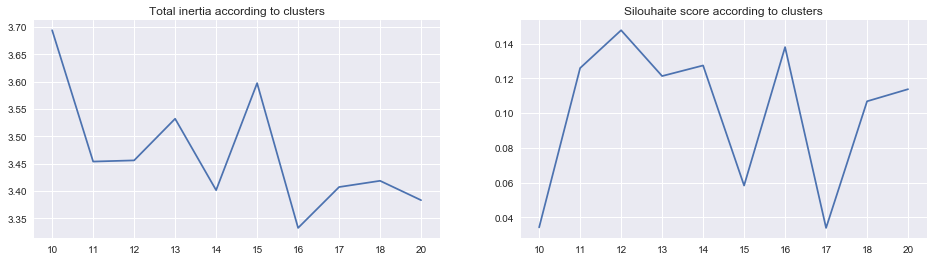

In [33]:
%matplotlib inline
clusters= np.linspace(10,20,10).astype(int)
silouhaite = []
inertia = []
for cluster in clusters:
    labels, medoids = kMedoids.cluster(euclid_distance,k= cluster)
    silouhaite.append(hlp.getSilouhaite(X_z,labels))
    sse = hlp.getSSE(X_z,X_z[labels])
    inertia.append(np.sqrt(sse/len(labels)))
    

plt.figure(figsize=(16,4))
    
plt.subplot(1,2,1)
inertia = np.array(inertia)
plt.title("Total inertia according to clusters")    
plt.plot(np.arange(0,len(clusters)),inertia)#scale it to acc2
plt.xticks(np.arange(0,len(clusters)),clusters)


acc = np.diff(inertia, 2)  # 2nd derivative of the inertia curve
#plt.plot(np.arange(2,len(clusters)), acc)
best_ks = acc.argsort()[::-1]
k =  best_ks+ 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:",clusters[k])



plt.subplot(1,2,2)
silouhaite = np.array(silouhaite)
plt.title("Silouhaite score according to clusters")    
plt.plot(np.arange(0,len(clusters)),silouhaite)#scale it to acc2
plt.xticks(np.arange(0,len(clusters)),clusters)
best_ks = silouhaite.argsort()[::-1]
print("clusters:",clusters[best_ks])

## K-medoids Clustering

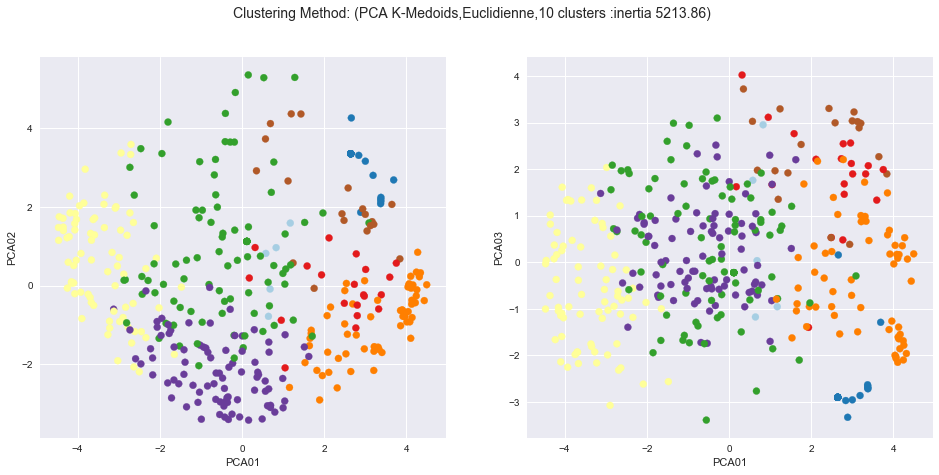

In [39]:
n_cluster = 10
label, medoids_euc = kMedoids.cluster(euclid_distance,k= n_cluster)
labels_kmedoids = label

labels_kmedoids_corr,medoids_corr = kMedoids.cluster(corr_distance,k= n_cluster)
labels_kmedoids_spear,medoids_spear = kMedoids.cluster(corr_distance,k= n_cluster)


SSE["kMedoids"] = hlp.getSSE(X_z,X_z[labels_kmedoids])
SSE["kMedoids_corr"] = hlp.getSSE(X_z,X_z[labels_kmedoids_corr])
SSE["kMedoids_spear"] = hlp.getSSE(X_z,X_z[labels_kmedoids_spear])


SILOUHAITE["kMedoids"] = hlp.getSilouhaite(X_z,labels_kmedoids)
SILOUHAITE["kMedoids_corr"] = hlp.getSilouhaite(X_z,labels_kmedoids_corr)
SILOUHAITE["kMedoids_spear"] = hlp.getSilouhaite(X_z,labels_kmedoids_spear)


hlp.Clusters_plot(X= X_pca, labels = label
                  ,info=["PCA K-Medoids","Euclidienne","%d clusters :inertia %.2f"%(len(set(label)),SSE["kMedoids"])])
#hlp.Clusters_plot(X= X_tsne, labels = label,info=["TSNE K-Medoids","Correlation","%d clusters"%len(set(label))])

### t-SNE representation of the clustering

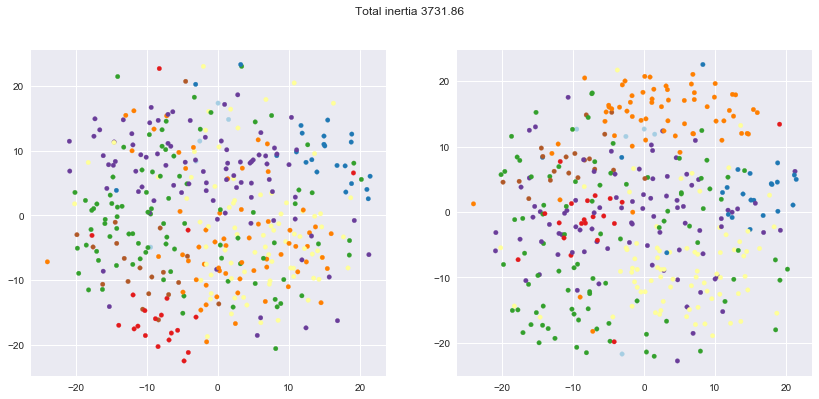

In [40]:
X_tsne = TSNE(n_components = 3).fit_transform(X_z)

plt.figure(figsize=(14,6))
colors = [str(item/255.) for item in labels_kmedoids]
plt.suptitle("Total inertia %.02f"%kmeans.inertia_)  
plt.subplot(1,2,1)
plt.scatter(X_tsne[:,0],X_tsne[:,1],cmap ="Paired" ,c=colors,s=20)
plt.subplot(1,2,2)
plt.scatter(X_tsne[:,0],X_tsne[:,2],cmap ="Paired" ,c=colors,s=20)
plt.show(block = True)

## Clustering methods Metrics

In [41]:
for k,v in SSE.items():
    print(" \"%s\" : %.2f"%(k,v))

print()
    
for k,v in SILOUHAITE.items():
    print(" \"%s\" : %.2f"%(k,v))

 "Agg_complete" : 14611.69
 "kMedoids" : 5213.86
 "kMedoids_corr" : 5563.25
 "Ward" : 16545.45
 "kMeans" : 18743.53
 "kMedoids_spear" : 5651.68

 "kMedoids_spear" : 0.12
 "kMedoids" : 0.15
 "kMedoids_corr" : 0.09


# Save Clustering Results

In [42]:
processed_path = "..\\data\\processed\\"
file_name = "p2c4_clustering_clean.csv"

version = 2

file_name = "p2_clustering_clean_mois_v%d.csv"%version


def labels_to_df(labels):
    medoid_cluster_dict = dict()
    
    medoids = list(set(labels))
    for i,l in enumerate(medoids):
        medoid_cluster_dict[l] = i+1

    pd_tuples_list = list(product_df_full[row_headers].itertuples(index=False))
    headers_list = [tuple(x) for x in pd_tuples_list]
    
    rows=[]
    for i,h in enumerate(headers_list):
        m = labels[i]
        rows.append([h[0],medoid_cluster_dict[m],"%s"%(headers_list[m],)])


    label_df = pd.DataFrame(rows,columns = row_headers + ["Cluster","Centroid"])
    return label_df




eucl_df = labels_to_df(labels_kmedoids)
corr_df = labels_to_df(labels_kmedoids_corr)
spear_df = labels_to_df(labels_kmedoids_spear)


eucl_df.to_csv(models_path+"euc_"+file_name, sep=';', encoding='utf-8')
corr_df.to_csv(models_path+"corr_"+file_name, sep=';', encoding='utf-8')
spear_df.to_csv(models_path+"spear_"+file_name, sep=';', encoding='utf-8')


print(eucl_df.shape)
eucl_df.head()

(382, 3)


Product  Cluster             Centroid
0  GBA001BND060FS        8  ('GWF021CAE180FS',)
1  GBA001BND060SS        9  ('GWM007NTA150FS',)
2  GBA001BND160FS        3  ('TBG001BND180BV',)
3  GBA001BND250FS        5  ('GKC005ESB100FS',)
4  GBA001BNR250FS        1  ('GCO002BNR300FS',)

# Display Clustering Results

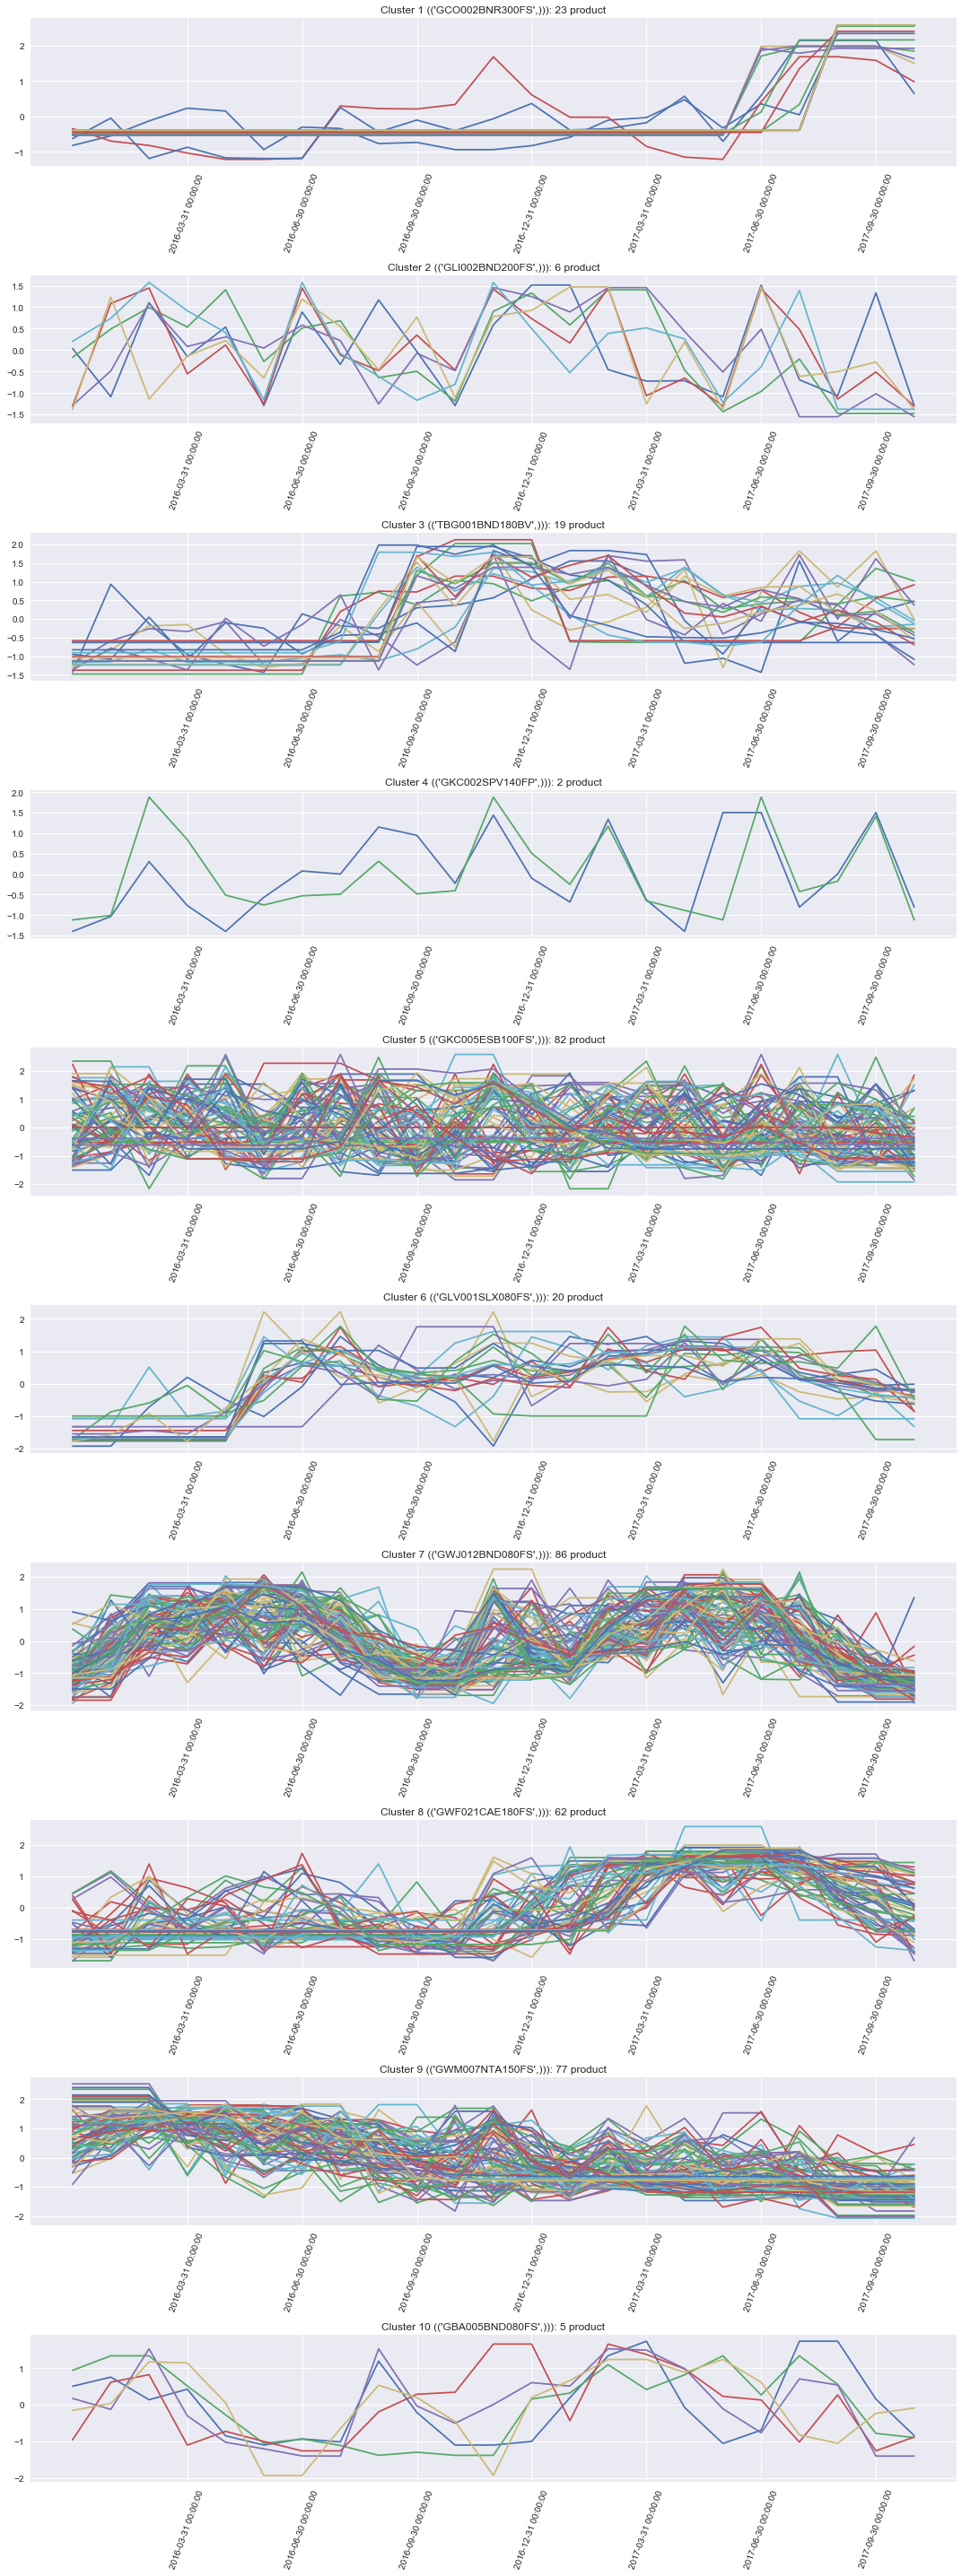

In [43]:
carr = hlp.Cluster_series_plot(data_df = product_df_full, cluster_df = eucl_df,headers = row_headers)

In [ ]:
carr = hlp.Cluster_series_plot(data_df = product_df_full, cluster_df = corr_df,headers = row_headers)

In [ ]:
carr = hlp.Cluster_series_plot(data_df = product_df_full, cluster_df = spear_df,headers = row_headers)

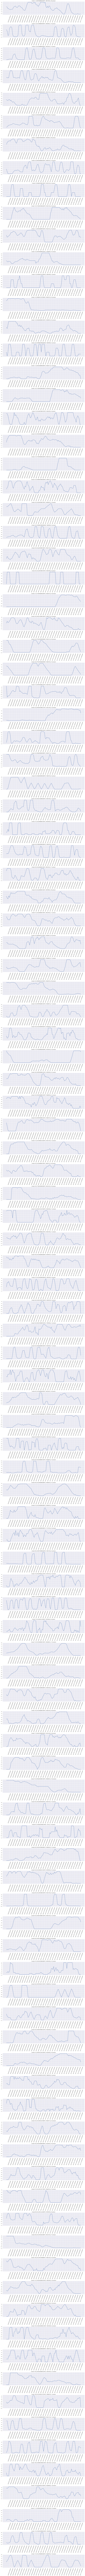

In [100]:
carr = hlp.Cluster_series_plot(data_df = product_df_full, cluster_df = eucl_df,headers = row_headers,centroid_only = True)

########################################################################################################################

########################################################################################################################

# Other Methods

## BIRCH Algorithm

In [ ]:
label = Birch(n_clusters= n_cluster, threshold=0.5, compute_labels=True).fit_predict(X_z)
labels_birch = label

SSE["Birch"] = hlp.getSSE(X_z,X_z[labels_birch])

hlp.Clusters_plot(X= X_pca, labels = label,info=["PCA BIRCH","(50, 0.5)","%d clusters"%len(set(label))])

## SOM

In [ ]:
from minisom import MiniSom   


som = MiniSom(14, 14, 104, sigma=0.5, learning_rate=0.01) # initialization of 6x6 SOM

som.train_batch(X_z, 1000) # trains the SOM with 100 iterations

# Plotting the response for each pattern in the iris dataset
plt.bone()
plt.pcolor(som.distance_map().T)  # plotting the distance map as background
plt.colorbar()

qnt = som.quantization(X_z)
x,y = som.winner(X_z[0])


plt.show()


# SOM with SOMpy

In [1]:
import sompy
mapsize = [14,14]
som = sompy.SOMFactory().build(Data1, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  
# this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='info')  # verbose='debug' will print more, and verbose=None wont print anything

AttributeError: 'module' object has no attribute 'SOMFactory'

# Fuzzy c-means

In [ ]:
import skfuzzy as fuzz

ncenters = n_cluster
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        X_z.T, ncenters, 2, error=0.005, maxiter=1000, init=None)



labels_fuzzy = np.argmax(u, axis=0)

## Representation methods
### PAA_SAX representation

In [ ]:
from pyts.transformation import PAA,SAX
from pyts.visualization import plot_paa, plot_sax
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
ts = X_z[0].reshape(1,-1)

paa_win = 100
sax_bin = 30


#PAA example
paa = PAA(window_size=None, output_size=paa_win, overlapping=True)
X_paa = paa.transform(ts)
plot_paa(ts[0], window_size=None, output_size=paa_win, overlapping=True, marker='o')

#SAX example
sax = SAX(n_bins=sax_bin, quantiles='gaussian')
X_sax = sax.transform(X_paa)
plot_sax(X_paa[0], n_bins=sax_bin, quantiles='gaussian')
plt.show()

#Extract SAX vector
X_SAX= []
for x in X_z:
    ts = x.reshape(1,-1)
    paa = PAA(window_size=None, output_size=paa_win, overlapping=True)
    X_paa = paa.transform(ts)
    sax = SAX(n_bins=sax_bin, quantiles='gaussian')
    X_sax = sax.transform(X_paa)[0]
    X_SAX.append(list(X_sax))

#Cast back to int
X_SAX = np.array(X_SAX).astype('|S1')
X_SAX = X_SAX.view(np.uint8) - 98
# X_z = X_SAX
# N,M  = X_z.shape


In [125]:
tuple([1,2,3])

(1, 2, 3)